In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from mpl_toolkits.mplot3d import Axes3D
import pylab
import itertools
import matplotlib as mpl
from scipy import linalg

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


import seaborn as sns
sns.set()

In [3]:
df = pd.read_csv('Torschlag_Trafo_07122015_to_11122015.csv',sep=',')

# Method to calculate the PCA which captures very less variance

In [3]:
def getLastPCAcomp(data, n_lastcomponents):
    # Generate a covariance matrix
    mean_vec = np.mean(data,axis=0)
    cov_mat = (data - mean_vec).T.dot((data - mean_vec)) / (data.shape[0]-1)

    # Get Eigen values and Eigen vectors
    eig_vals, eig_vecs = np.linalg.eig(cov_mat)

    tmp_dict = {}
    for itr in xrange(len(eig_vals)):
        tmp_dict.update({eig_vals[itr]:eig_vecs[itr]})

    # Eigen vectors corresponding to ascending order eigen values
    asc_eigen_vec = [value for (key, value) in sorted(tmp_dict.items())]

    return (asc_eigen_vec[:n_lastcomponents])

In [4]:
df_filt = df[["V1","V2","V3","I1","I2","I3","I_N","Pges","Sges","CosPhi","Egy_trpt","Egy_con"]]
data = np.array(df_filt)

mean_vec = np.mean(data,axis=0)
cov_mat = (data - mean_vec).T.dot((data - mean_vec)) / (data.shape[0]-1)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

n_lastcomponents = 5
pca_components = getLastPCAcomp(data, n_lastcomponents)
print len(pca_components)

5


In [11]:
data.shape[0]

380648

In [5]:
sorted(eig_vals)

[0.0,
 0.00039739377297505458,
 0.016392281982193762,
 0.019248245511819632,
 0.63799301110646189,
 6.4403085800526956,
 9.6551246811133851,
 25.927713594261469,
 124.48308733983443,
 287347.50672412489,
 873782537.30320847,
 710502374716.58276]

In [6]:
pca_components

[array([ -9.99994359e-01,  -3.35625532e-03,  -1.32156785e-04,
         -6.52214674e-07,  -1.44283816e-06,  -3.85115668e-07,
         -3.95298436e-07,  -4.30816506e-08,   4.14883831e-09,
          6.48347277e-09,   8.25236483e-10,   0.00000000e+00]),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  6.21679013e-09,  -5.66496925e-07,  -2.76738763e-05,
         -1.64068201e-03,   6.76997159e-04,   4.39784004e-04,
          3.53359379e-04,   5.76199900e-04,   1.50236392e-02,
          1.73949699e-03,   9.99883725e-01,   0.00000000e+00]),
 array([  2.35011030e-03,  -7.27240489e-01,   6.86373179e-01,
          6.79992727e-04,  -1.22972086e-03,  -3.38310981e-04,
          5.41061015e-04,   2.28550677e-03,   1.61796020e-05,
          3.87345467e-05,   1.88631982e-05,   0.00000000e+00]),
 array([  2.39976259e-03,  -6.86372115e-01,  -7.27244464e-01,
         -1.09207325e-03,   1.31732943e-03,   3.11081663e-04,
         -3.47543101e-05,   1.53213749e-04,  -1.69877278

In [ ]:
mean = np.mean(df_filt['V1'])
mean

In [ ]:
std = np.std(df_filt['V1'])
std

In [ ]:
outlier_assumed = mean + 3 *std
outlier_assumed

In [ ]:
pca_components_test = getLastPCAcomp(data, 12)
pca_components_test

In [ ]:
plt.plot(pca_components_test)

# PCA Based Anomaly Detection 

In [5]:
X_std = StandardScaler().fit_transform(df_filt)

In [7]:
sklearn_pca = PCA(n_components=12)
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [14]:
Y_sklearn[:7,:]

array([[  6.54359812e+00,  -1.97427324e+00,  -3.59916514e-01,
          1.66672947e+00,   8.08426964e-01,  -5.32002158e-02,
          1.66829638e-01,   5.34446612e-02,   8.17588456e-02,
          8.19573807e-04,   9.10767086e-04,  -0.00000000e+00],
       [  6.70684680e+00,  -1.97960886e+00,  -5.49971223e-01,
          1.52297937e+00,   6.72670651e-01,  -7.50135584e-02,
          2.31734065e-01,   1.81799902e-02,   4.22210107e-02,
          7.83333992e-03,  -4.78304449e-03,  -0.00000000e+00],
       [  6.70684063e+00,  -1.97961844e+00,  -5.49908936e-01,
          1.52289527e+00,   6.72665411e-01,  -7.50186300e-02,
          2.31732314e-01,   1.81797134e-02,   4.22214191e-02,
          7.83348682e-03,  -4.78316415e-03,  -0.00000000e+00],
       [  6.70684063e+00,  -1.97961844e+00,  -5.49908936e-01,
          1.52289527e+00,   6.72665411e-01,  -7.50186300e-02,
          2.31732314e-01,   1.81797134e-02,   4.22214191e-02,
          7.83348682e-03,  -4.78316415e-03,  -0.00000000e+00],
    

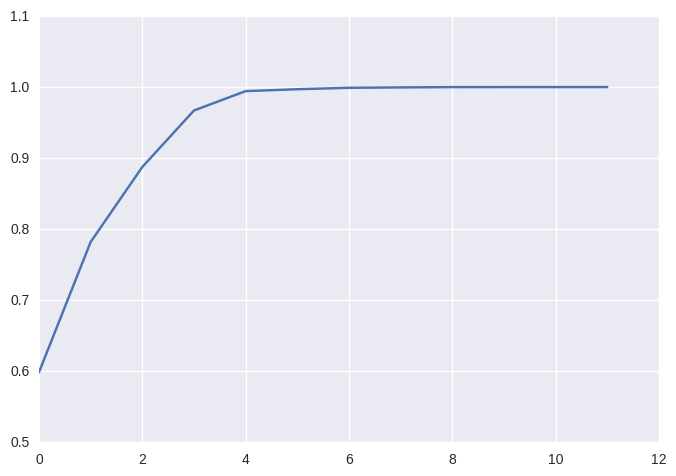

In [9]:
plt.plot(sklearn_pca.explained_variance_ratio_.cumsum())

Split the PCA components into normal and abnormal depending on the variance. The first 4 components capture most of the variances as can be seen from the *sklearn_pca.explained_variance_ratio_.cumsum()* plot and hence, will be considered as **normal** and rest as **abnormal**

In [ ]:
Y_sklearn
Y_normal = Y_sklearn[:,0:5]
Y_abnormal = Y_sklearn[:,5:-1]

In [ ]:
sklearn_pca.explained_variance_ratio_.cumsum()

In [ ]:
#plt.scatter(Y_sklearn[:,5], Y_sklearn[:,1],color=['red','red','red','red','red','blue','blue','blue','blue','blue'])
plt.scatter(Y_normal, Y_abnormal[:,0:5],color=['red','blue'])

In [10]:
class PCA_decomp:
    def __init__(self):
        self.e_values = None
        self.e_vectors = None
        self.mean_data = None

    # Find all eigenvalues and eigenvectors
    # data -> instances as rows
    def prepare(self, data):
        # Substract mean
        self.mean_data = np.mean(data, axis=0)
        adj_data = data - self.mean_data
        # Covariance matrix
        covariance = np.cov(adj_data.T)
        # Eigenstuff
        self.e_values, self.e_vectors = np.linalg.eig(covariance)
        i = np.argsort(self.e_values)
        i = i[::-1]
        self.e_vectors = self.e_vectors[:,i]
        self.e_values = self.e_values[i]
        # Print the coverage of variance
        table = pd.DataFrame(index=['eVal','eTotal', 'Idiv%', '%'], columns=list(range(len(self.e_values))))
        current_val = 0
        total_val = np.sum(self.e_values)
        for i, val in enumerate(self.e_values):
            current_val += val
            table[i] = [val, current_val, val/total_val, current_val/total_val]
        print('Coverage of Variance:')
        print(table)
        print("\n")

    # Project the data into the normal or abnormal subspace
    def project(self, data, dimensions, normal_subspace=True):
        adj_data = data - self.mean_data
        if normal_subspace:
            # Extract only the top most eigenvectors
            e_vectors = self.e_vectors[:,:dimensions]
        else:
            # Extract the smallers eigenvectors as the anomalous part
            e_vectors = self.e_vectors[:,dimensions:]
        # Return the projected data
        return np.dot(adj_data, e_vectors)

    def revert(self, projected_data, dimensions):
        e_vectors = self.e_vectors[:,:dimensions]
        return np.dot(projected_data, e_vectors.T) + self.mean_data

In [11]:
df_filt.iloc[:2,:]

,V1,V2,V3,I1,I2,I3,I_N,Pges,Sges,CosPhi,Egy_trpt,Egy_con
0,233.55,232.60,232.56,113.78,146.12,138.27,37.54,87138.89,92784.46,0.93,1674.0,3098679.04
1,233.40,232.49,232.45,116.19,144.43,140.08,37.54,87920.99,93248.45,0.94,1674.0,3098679.04


In [12]:
a = PCA_decomp()
df_pca = a.prepare(df_filt)

Coverage of Variance:
                  0             1             2             3             4   \
eVal    7.105024e+11  8.737825e+08  2.873475e+05  1.244831e+02  2.592770e+01   
eTotal  7.105024e+11  7.113762e+11  7.113764e+11  7.113764e+11  7.113764e+11   
Idiv%   9.987713e-01  1.228298e-03  4.039317e-07  1.749890e-10  3.644723e-11   
%       9.987713e-01  9.999996e-01  1.000000e+00  1.000000e+00  1.000000e+00   

                  5             6             7             8             9   \
eVal    9.655070e+00  6.439969e+00  6.379833e-01  1.913803e-02  1.585502e-02   
eTotal  7.113764e+11  7.113764e+11  7.113764e+11  7.113764e+11  7.113764e+11   
Idiv%   1.357238e-11  9.052829e-12  8.968294e-13  2.690282e-14  2.228780e-14   
%       1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   

                  10            11  
eVal    3.973774e-04  0.000000e+00  
eTotal  7.113764e+11  7.113764e+11  
Idiv%   5.586036e-16  0.000000e+00  
%       1.000000e+00  1.0000

In [ ]:
df_pca_abnormal = a.project(df_filt,8,normal_subspace=False)

In [ ]:
df_pca_abnormal.shape

In [ ]:
df_pca_abnormal[:2,:]

In [ ]:
plt.plot(df_pca_abnormal)

# Calculate the Squared Prediction Error

In [66]:
def calc_spe(data):
    norm_val = np.linalg.norm(data,axis=1)
    SPE = norm_val * norm_val
    return SPE

In [67]:
residual_PCA = Y_sklearn[:,7:]
residual_PCA

array([[ 0.05344466,  0.08175885,  0.00081957,  0.00091077, -0.        ],
       [ 0.01817999,  0.04222101,  0.00783334, -0.00478304, -0.        ],
       [ 0.01817971,  0.04222142,  0.00783349, -0.00478316, -0.        ],
       ..., 
       [-0.00093463,  0.02050835,  0.03309319, -0.01841953,  0.        ],
       [-0.00093463,  0.02050835,  0.03309319, -0.01841953,  0.        ],
       [-0.00093463,  0.02050835,  0.03309319, -0.01841953,  0.        ]])

$$ y = ŷ + ỹ $$



$$ŷ = PP^Ty = Cy$$ and $$ỹ = I − PP^T y = C̃y $$


$$ \textbf{SPE} ≡  \parallel ỹ \space \parallel ^ 2 $$

$$ \delta^2_\alpha == \phi_1 \Bigg[ \frac{c_\alpha\sqrt{2\phi_2 h^2_0}}{\phi_1} + 1 + \frac{ \phi_2 h_0(h_0 -1)}{\phi_1 ^ 2} \Bigg]^\frac{1}{h_0} $$

$$\phi_i=\sum_{j=r+1}^m \lambda^i_j \quad for \quad i = 1,2,3 $$

$$ h_0 = 1 - \frac{2\phi_1 \phi_3}{3\phi_2 ^2} $$

In [69]:
residual_PCA.shape

(380648, 5)

In [68]:
spe_err = calc_spe(residual_PCA)
spe_err

array([ 0.00954234,  0.00219736,  0.00219739, ...,  0.0018559 ,
        0.0018559 ,  0.0018559 ])

In [72]:
spe_err.shape[0]

380648

In [73]:
for i in range(spe_err.shape[0]):
    if spe_err[i] > 0.5:
        print spe_err[i]

0.655096066478
0.549620067734
1.6323129624
2.99055728583
2.61816983609
1.41362287361
1.02823390541
1.00240920378
0.831188002387
1.12200362731
2.77768398332
0.547863752776
1.72638672325
1.28744120153
1.26896948522
2.9285190072
1.0705946633
0.682580726931
0.529952322145
0.947725056281
0.978758778867
0.537830358269
0.637113484558
1.61184509401
1.18797501979
0.817818833379
0.500052504333
1.77422821209
1.19476902198
2.58744739615
2.53068625047
0.971842257942
0.971842397422
0.971842397422
0.971842397422


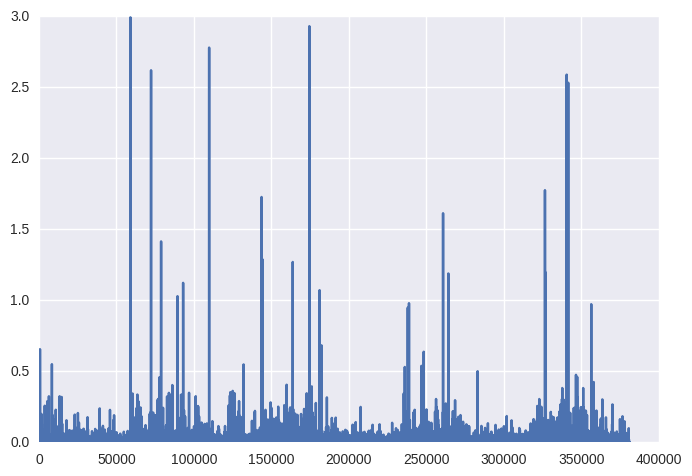

In [65]:
plt.plot(spe_err)

# Calculate the Q-threshold

Remember eigen values are in descending order

In [4]:
df_filt = df[["V1","V2","V3","I1","I2","I3","I_N","Pges","Sges","CosPhi","Egy_trpt","Egy_con"]]
data = np.array(df_filt)

mean_vec = np.mean(data,axis=0)
cov_mat = (data - mean_vec).T.dot((data - mean_vec)) / (data.shape[0]-1)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [5]:
eig_vals # gives the eigen values of the residual PCA components

array([  7.10502375e+11,   8.73782537e+08,   2.87347507e+05,
         1.24483061e+02,   2.59277037e+01,   9.65506991e+00,
         6.43996916e+00,   6.37983336e-01,   1.91378607e-02,
         1.58547506e-02,   3.97377375e-04,   0.00000000e+00])

In [7]:
eig_vecs.shape

(12, 12)

In [74]:
list_eig = []
for i in (1,2,3):
    for j in range(7,12):
        list_eig.append(np.power(eig_vals[j],i))

In [82]:
list_eig

[0.63798333629926851,
 0.019137860715692484,
 0.015854750567749293,
 0.00039737737497428424,
 0.0,
 0.40702273739554556,
 0.00036625771277324563,
 0.00025137311556554655,
 1.5790877814145289e-07,
 0.0,
 0.25967372395327121,
 7.0093890931024786e-06,
 3.9854580467297577e-06,
 6.2749375743247188e-11,
 0.0]

In [77]:
phi_1,phi_2,phi_3 = list_eig[:5],list_eig[5:10],list_eig[10:15]

In [78]:
phi_1

[0.63798333629926851,
 0.019137860715692484,
 0.015854750567749293,
 0.00039737737497428424,
 0.0]

In [79]:
h0 = 1 - (2 * np.multiply(phi_1,phi_3))/(3 * np.power(phi_3,2))

In [80]:
h0

array([ -6.37910135e-01,  -1.81921195e+03,  -2.65110011e+03,
        -4.22184578e+06,              nan])

In [84]:
a = 0.2
list_threshold = []
for i in range(0,5):
    b = np.sqrt(2 * phi_2[i] * h0[i] * h0[i])
    c = phi_1[i]
    d = phi_2[i] * h0[i] * (h0[i] - 1)
    e1 = 1/h0[i]
    list_threshold.append( c * np.power( ((a * b)/c) + 1 + (d/(c * c)),e1) )

In [85]:
list_threshold

[0.18207332420263672,
 0.018980575662062186,
 0.015760743059876962,
 0.00039737450311137773,
 nan]